In [33]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy import signal

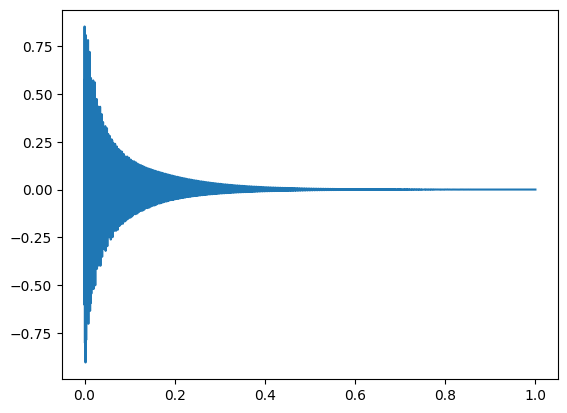

In [34]:
path = 'pluc.wav'
pluc_window = 50
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

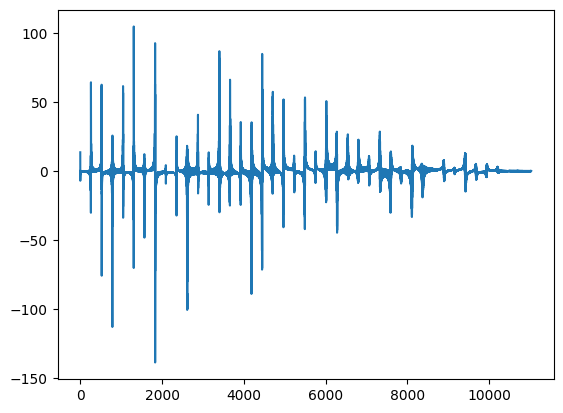

In [35]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

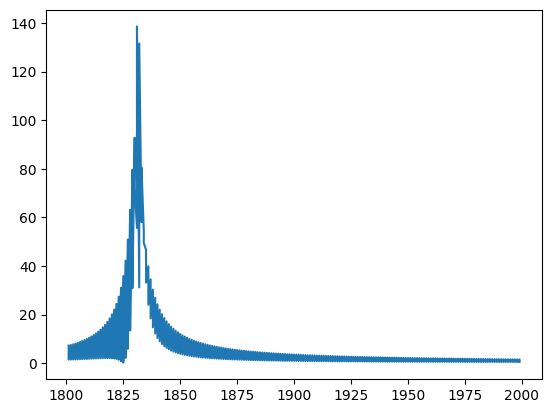

In [36]:
plt.plot(W[(W>1800)&(W<2000)],abs(audio_fft[(W>1800)&(W<2000)]))

In [37]:
def fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i] > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i] > fig_a[-1]:
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(0.0, 100.0),
 (211.0, 311.0),
 (472.0, 572.0),
 (737.0, 837.0),
 (996.0, 1096.0),
 (1258.0, 1358.0),
 (1309.0, 1409.0),
 (1517.0, 1617.0),
 (1780.0, 1880.0),
 (2042.0, 2142.0),
 (2305.0, 2405.0),
 (2562.0, 2662.0),
 (2613.0, 2713.0),
 (2828.0, 2928.0),
 (3091.0, 3191.0),
 (3351.0, 3451.0),
 (3612.0, 3712.0),
 (3874.0, 3974.0),
 (4139.0, 4239.0),
 (4190.0, 4290.0),
 (4398.0, 4498.0),
 (4449.0, 4549.0),
 (4658.0, 4758.0),
 (4709.0, 4809.0),
 (4921.0, 5021.0),
 (4972.0, 5072.0),
 (5179.0, 5279.0),
 (5445.0, 5545.0),
 (5496.0, 5596.0),
 (5706.0, 5806.0),
 (5967.0, 6067.0),
 (6018.0, 6118.0),
 (6069.0, 6169.0),
 (6224.0, 6324.0),
 (6492.0, 6592.0),
 (6751.0, 6851.0),
 (6802.0, 6902.0),
 (7010.0, 7110.0),
 (7275.0, 7375.0),
 (7544.0, 7644.0),
 (8067.0, 8167.0),
 (8118.0, 8218.0),
 (8303.0, 8403.0),
 (8354.0, 8454.0),
 (8839.0, 8939.0),
 (9361.0, 9461.0),
 (9623.0, 9723.0),
 (9894.0, 9994.0),
 (10152.0, 10252.0)]

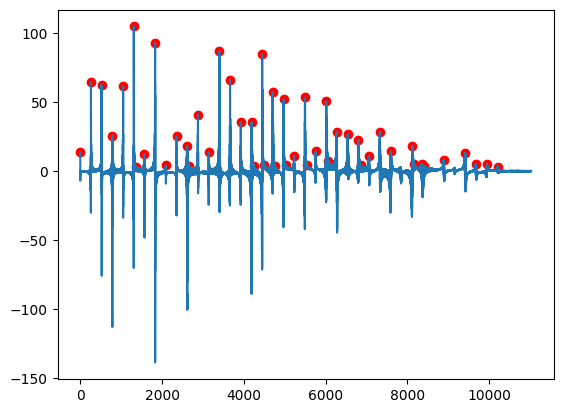

In [38]:
audio_fft, W = fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,pluc_window)
ranges

10152
10252


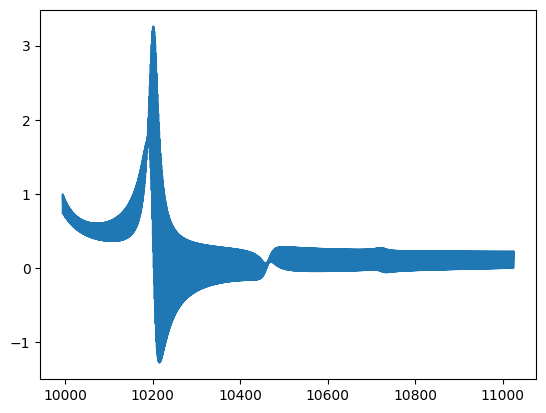

In [39]:
plt.plot(W[W>9994],audio_fft[W>9994])
print(int(W[audio_fft == max(audio_fft[W>9994])])-50)
print(int(W[audio_fft == max(audio_fft[W>9994])])+50)

In [40]:
print(ranges)
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,ranges[i][1]-ranges[i][0],len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*han/20) 
    plt.plot(W,cuttoff)
    return cuttoff


[(0.0, 100.0), (211.0, 311.0), (472.0, 572.0), (737.0, 837.0), (996.0, 1096.0), (1258.0, 1358.0), (1309.0, 1409.0), (1517.0, 1617.0), (1780.0, 1880.0), (2042.0, 2142.0), (2305.0, 2405.0), (2562.0, 2662.0), (2613.0, 2713.0), (2828.0, 2928.0), (3091.0, 3191.0), (3351.0, 3451.0), (3612.0, 3712.0), (3874.0, 3974.0), (4139.0, 4239.0), (4190.0, 4290.0), (4398.0, 4498.0), (4449.0, 4549.0), (4658.0, 4758.0), (4709.0, 4809.0), (4921.0, 5021.0), (4972.0, 5072.0), (5179.0, 5279.0), (5445.0, 5545.0), (5496.0, 5596.0), (5706.0, 5806.0), (5967.0, 6067.0), (6018.0, 6118.0), (6069.0, 6169.0), (6224.0, 6324.0), (6492.0, 6592.0), (6751.0, 6851.0), (6802.0, 6902.0), (7010.0, 7110.0), (7275.0, 7375.0), (7544.0, 7644.0), (8067.0, 8167.0), (8118.0, 8218.0), (8303.0, 8403.0), (8354.0, 8454.0), (8839.0, 8939.0), (9361.0, 9461.0), (9623.0, 9723.0), (9894.0, 9994.0), (10152.0, 10252.0)]


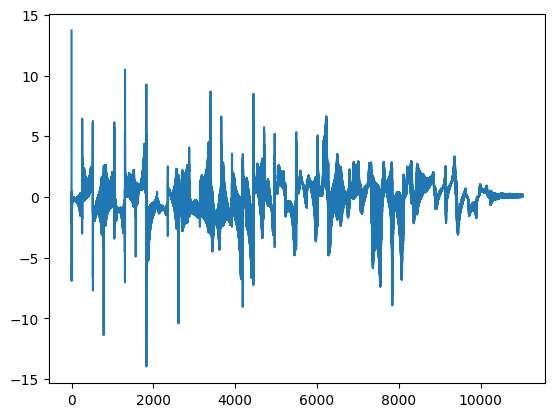

In [41]:
ranges.append((9629.0, 9729.0))
ranges.append((9894.0, 9994.0))
ranges.append((10152.0,10252.0))
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))

Audio(audio_final, rate = sample_rate)

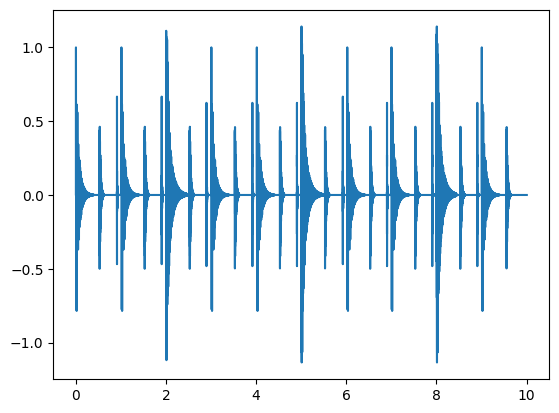

In [21]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)


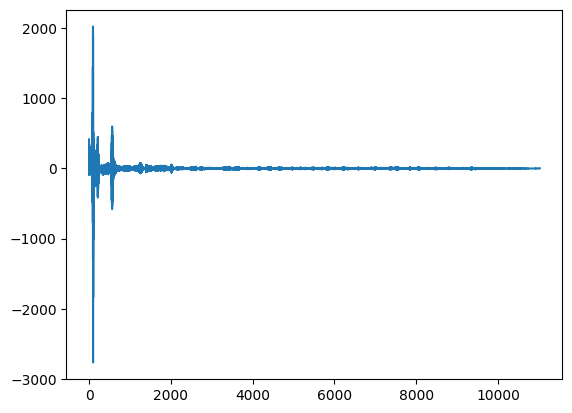

In [22]:
audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
Audio(audio_final, rate = sample_rate)

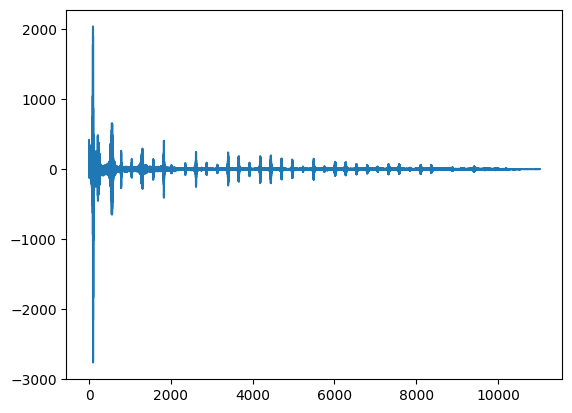

In [23]:
plt.plot(W,audio_fft)